# Polynomial regression
Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. 

## Implementing polynomial regression on Boston housing dataset

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_df = pd.read_csv('housing.csv', delimiter=r"\s+", names=column_names)

In [3]:
housing_df.shape

(506, 14)

In [4]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'crime vs medv')

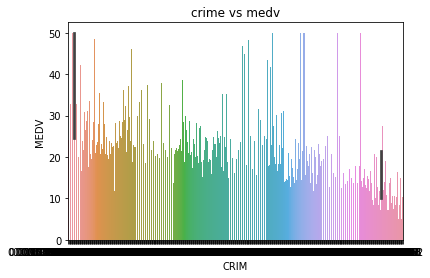

In [8]:
sns.barplot(x='CRIM', y='MEDV', data=housing_df)
plt.title('crime vs medv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc46a0f5690>,
      dtype=object)

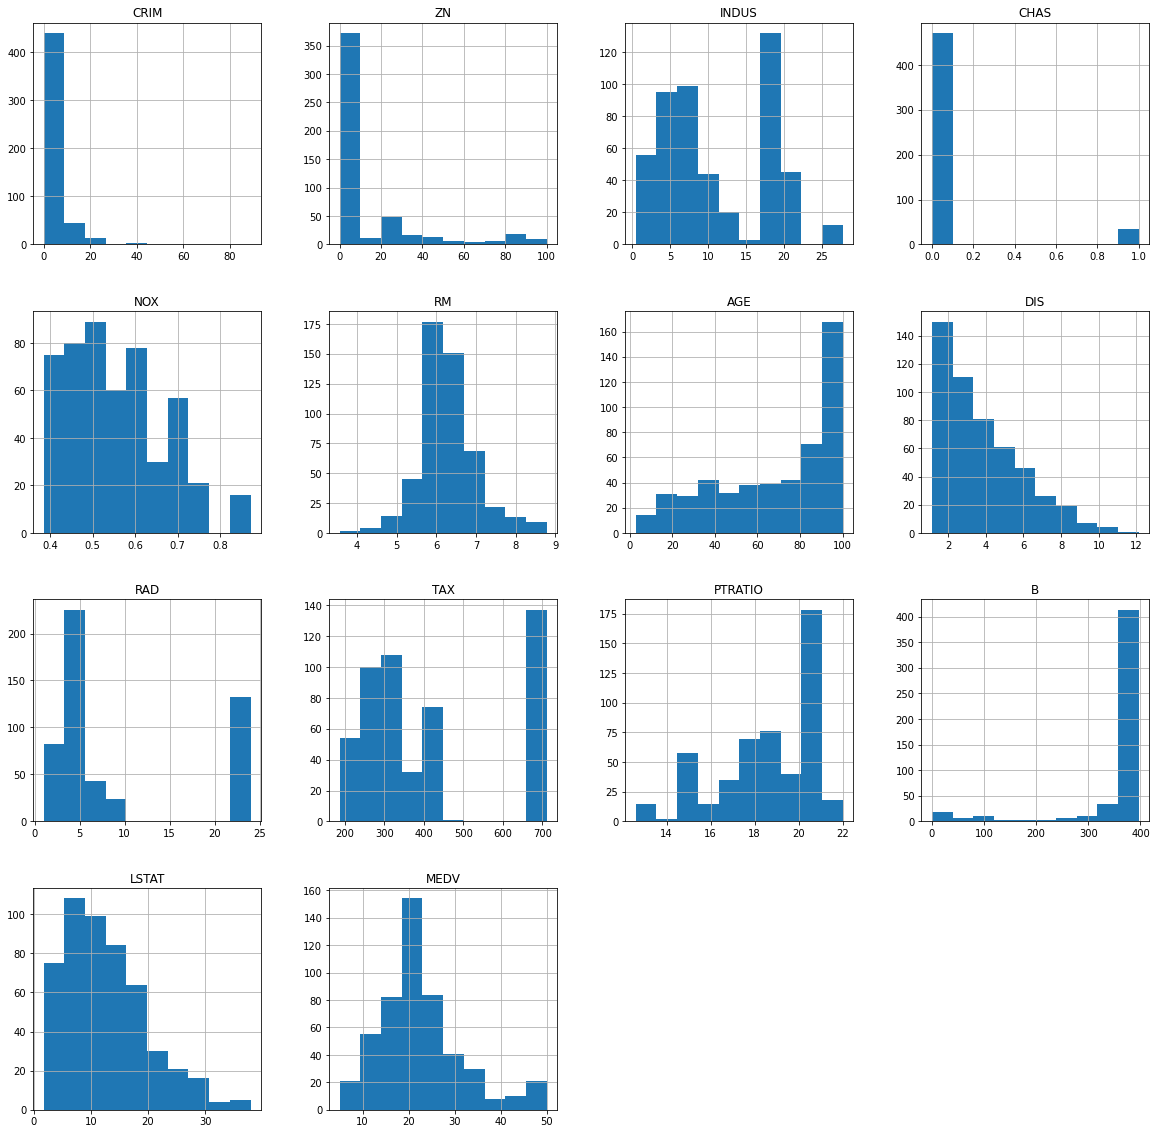

In [9]:
housing_df.hist(figsize=(20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


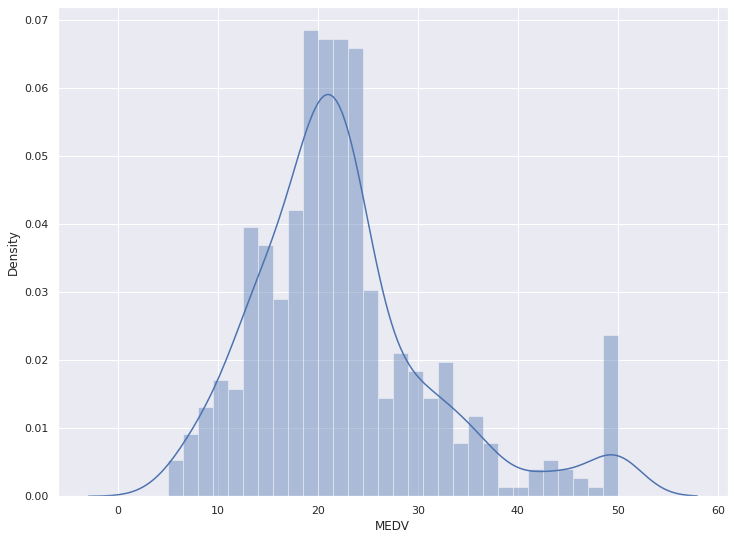

In [10]:
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(housing_df['MEDV'], bins=30)
plt.show()

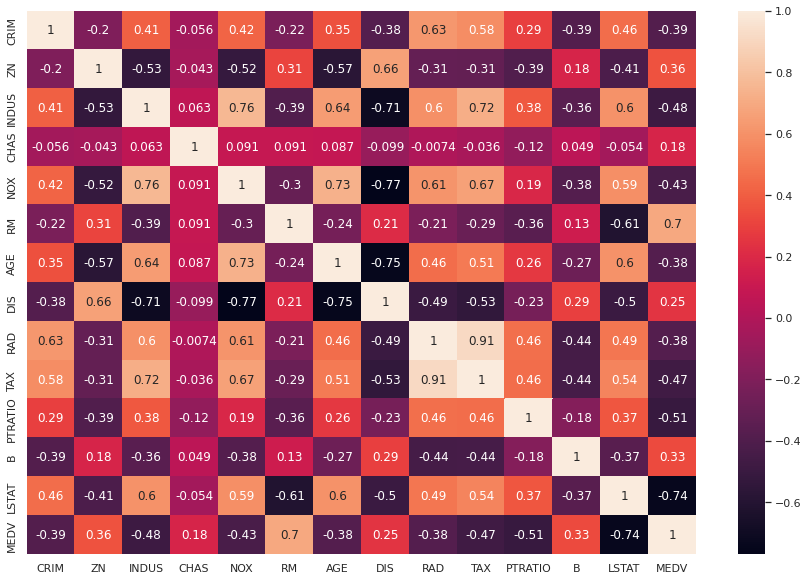

In [11]:
#understanding the relationship between variables
correlation = housing_df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [12]:
df = pd.DataFrame()
df['LSTAT'], df['MEDV'] = housing_df['LSTAT'], housing_df['MEDV']

In [13]:
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [14]:
x_train, x_test, y_train, y_test = train_test_split(df['MEDV'], df['LSTAT'])

In [15]:
print("Shape of x_train data: ", x_train.shape)
print("Shape of x_test data: ", x_test.shape)

Shape of x_train data:  (379,)
Shape of x_test data:  (127,)


In [16]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [17]:
x_train.head()

,MEDV
392,9.7
121,20.3
297,20.3
432,16.1
283,50.0


In [18]:
polynomial_features = PolynomialFeatures(degree=2)

In [19]:
x_train_poly1 = polynomial_features.fit_transform(x_train)
x_test_poly2 = polynomial_features.fit_transform(x_test)

In [20]:
x_train_poly1

array([[  1.  ,   9.7 ,  94.09],
       [  1.  ,  20.3 , 412.09],
       [  1.  ,  20.3 , 412.09],
       ...,
       [  1.  ,  15.2 , 231.04],
       [  1.  ,  25.3 , 640.09],
       [  1.  ,   8.7 ,  75.69]])

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train_poly1, y_train)

LinearRegression()

In [23]:
coefficient = model.coef_
coefficient

array([ 0.        , -1.72249306,  0.02094362])

In [24]:
intercept = model.intercept_
intercept

39.005488235379296

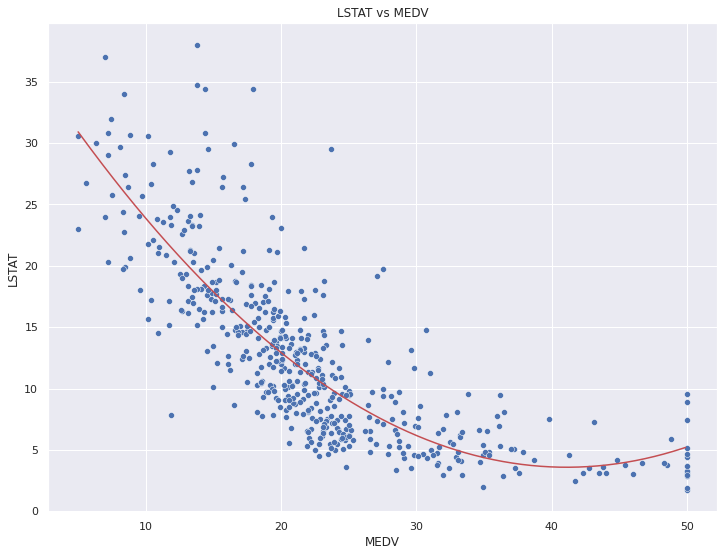

In [27]:
x_axis = np.arange(5,50,0.1)
r = intercept + coefficient[1]*x_axis + coefficient[2]*x_axis**2
sns.scatterplot(x='MEDV', y='LSTAT', data=df)
plt.title('LSTAT vs MEDV')
plt.plot(x_axis, r, color='r')

In [28]:
y_train_predicted = model.predict(x_train_poly1)

In [29]:
print("R2 score (training data): ", r2_score(y_train, y_train_predicted))

R2 score (training data):  0.6938090563453969


In [30]:
y_test_predicted = model.predict(x_test_poly2)

In [31]:
print("R2 score (on test data): ", r2_score(y_test, y_test_predicted))

R2 score (on test data):  0.6298465333095808


#### Using four features

In [32]:
X = pd.DataFrame()
X['LSTAT'], X['RM'], X['CRIM'], X['NOX'] = housing_df['LSTAT'], housing_df['RM'], housing_df['CRIM'], housing_df['NOX']
X.shape

(506, 4)

In [33]:
X.head()

,LSTAT,RM,CRIM,NOX
0,4.98,6.575,0.00632,0.538
1,9.14,6.421,0.02731,0.469
2,4.03,7.185,0.02729,0.469
3,2.94,6.998,0.03237,0.458
4,5.33,7.147,0.06905,0.458


In [34]:
Y = housing_df['MEDV']
Y.shape

(506,)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [36]:
print("Shape of x_train data: ", x_train.shape)
print("Shape of x_test data: ", x_test.shape)

Shape of x_train data:  (404, 4)
Shape of x_test data:  (102, 4)


In [37]:
x_train

,LSTAT,RM,CRIM,NOX
454,18.71,6.728,9.51363,0.7130
471,12.87,6.229,4.03841,0.5320
281,4.59,6.968,0.03705,0.4429
477,24.91,5.304,15.02340,0.6140
107,14.09,6.127,0.13117,0.5200
...,...,...,...,...
440,22.11,5.818,22.05110,0.7400
131,12.26,6.326,1.19294,0.6240
249,6.56,6.718,0.19073,0.4310
152,12.12,5.012,1.12658,0.8710


In [38]:
polynomial_features = PolynomialFeatures(degree=2)

In [39]:
x_train_poly1 = polynomial_features.fit_transform(x_train)
x_test_poly2 = polynomial_features.fit_transform(x_test)

In [40]:
x_train_poly1

array([[1.00000000e+00, 1.87100000e+01, 6.72800000e+00, ...,
        9.05091558e+01, 6.78321819e+00, 5.08369000e-01],
       [1.00000000e+00, 1.28700000e+01, 6.22900000e+00, ...,
        1.63087553e+01, 2.14843412e+00, 2.83024000e-01],
       [1.00000000e+00, 4.59000000e+00, 6.96800000e+00, ...,
        1.37270250e-03, 1.64094450e-02, 1.96160410e-01],
       ...,
       [1.00000000e+00, 6.56000000e+00, 6.71800000e+00, ...,
        3.63779329e-02, 8.22046300e-02, 1.85761000e-01],
       [1.00000000e+00, 1.21200000e+01, 5.01200000e+00, ...,
        1.26918250e+00, 9.81251180e-01, 7.58641000e-01],
       [1.00000000e+00, 1.01900000e+01, 5.36200000e+00, ...,
        1.35293024e+01, 2.83222940e+00, 5.92900000e-01]])

In [41]:
model = LinearRegression()

In [42]:
model.fit(x_train_poly1, y_train)

LinearRegression()

In [43]:
y_train_predicted = model.predict(x_train_poly1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


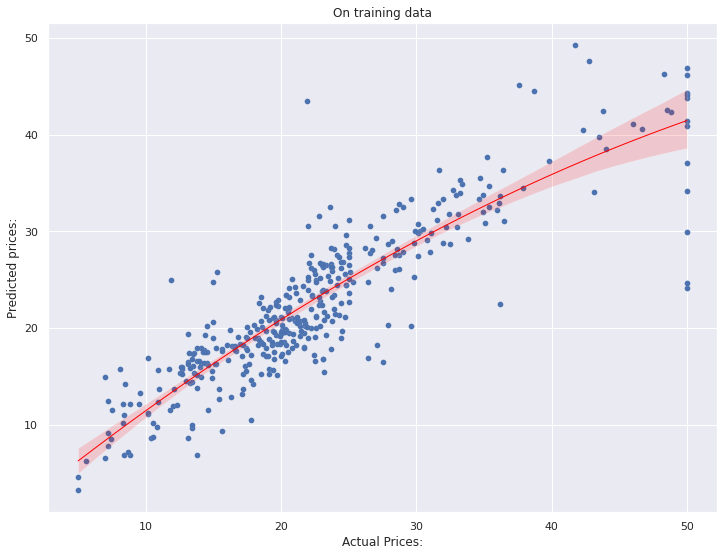

In [46]:
sns.scatterplot(y_train, y_train_predicted)
sns.regplot(y_train, y_train_predicted, scatter_kws={'s': 20}, line_kws={'color':'red', 'linewidth': 1}, order=2)
plt.xlabel("Actual Prices:")
plt.ylabel("Predicted prices:")
plt.title('On training data')
plt.show()

In [45]:
y_test_predicted = model.predict(x_test_poly2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


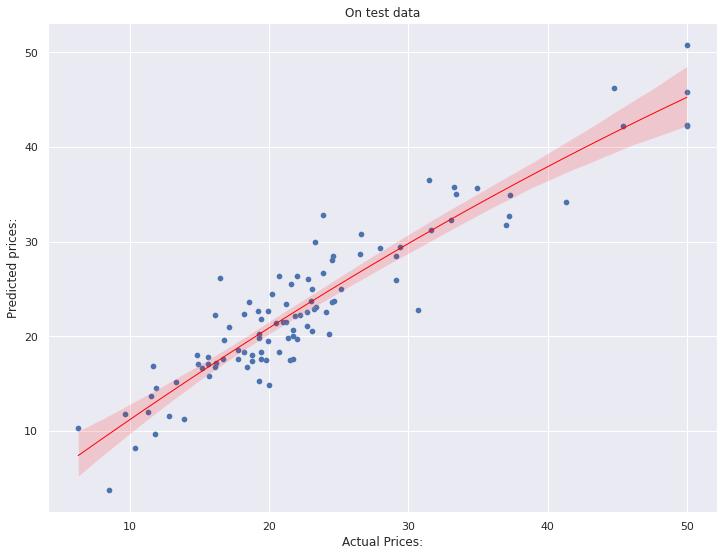

In [51]:
sns.scatterplot(y_test, y_test_predicted)
sns.regplot(y_test, y_test_predicted, scatter_kws={'s': 20}, line_kws={'color':'red', 'linewidth': 1}, order=2)
plt.xlabel("Actual Prices:")
plt.ylabel("Predicted prices:") 
plt.title('On test data')
plt.show()

In [48]:
print("R2 score (on training data): ", r2_score(y_train, y_train_predicted))

R2 score (on training data):  0.7841005838249772


In [49]:
print("R2 score (on test data): ", r2_score(y_test, y_test_predicted))

R2 score (on test data):  0.8644601354624735


# Summary
In this task I have implemented polynomial regression on Boston housing dataset and obtained R2 score of 0.864 on the test data.

#### References
* https://www.geeksforgeeks.org/polynomial-regression-in-r-programming/